# Linear Models
**Burton Rosenberg, May 2017**

This is a notebook exploring very simple linear models. It is inspired by the example found among the pages of [scipy-lectures.org](http://www.scipy-lectures.org/packages/statistics/index.html#a-simple-linear-regression).

### Initialize workspace and variables

When working in the Jupyter notebook, there are a couple of Jupyter-magic commands to load libraries and set options of graphing. Then we import into the python namespace the needed modules.


In [99]:
# %pylab
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import pandas
from statsmodels.formula.api import ols


We put all "constant" variables at the beginning of the code, so that we can change them, and also to give them names, helping to explain the code. We set up a function for the linear model.

We will run an experiment by perturbing with noise from the function named f. The linear fit to the data give slope, intercept pair that should approximate the parameters of f. They are, however, random variables drawn over the event space of the random noise. For each experiment we get a linear function g, think of it as $g_i(x)$ for experiment $i$.

The code reflects this by using the _lambda_ syntax of python to define a function g, which takes two variables, the slode and intercept, and returns a function! The returned function is a linear function. 

The inner lambda as three variables: x, m and b; x is bound, and m and b are free. However this lambda is defined where m and b are bound in the outer lambda. Even though the inner lambda is returned to outside the scope of the inner lambda, the binding remains. Hence when the inner lambda is eventually evaluated, the m and b are the value given when the inner lambda was defined. This is called [function currying](https://en.wikipedia.org/wiki/Currying). 


In [100]:

line_slope = 3
line_intercept = -5
noise_scaling = 4
x_min = -5
x_max = 5
np.random.seed(1)
n_experiments = 7

# the truth
def f(x):
    return line_slope*x+line_intercept

# g is a function on RxR returning a function R->R
g = lambda m,b : (lambda x : m*x + b)

print "A linear function of slope %f and intercept %f evaluated at %f:"%(line_slope,line_intercept,.75)
print "\t", f(.75)
print "\t", g(line_slope,line_intercept)(.75)


A linear function of slope 3.000000 and intercept -5.000000 evaluated at 0.750000:
	-2.75
	-2.75


### The experiment

We sample a normal distribution and apply it to samples of the function f, giving an experiment sampling f in the presence of noise. Panda and statsmodels are used to curve fit by a linear model the experiment. The resulting models are placed in a numpy array for further analysis.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     79.04
Date:                Sun, 21 May 2017   Prob (F-statistic):           5.28e-08
Time:                        13:44:01   Log-Likelihood:                -56.502
No. Observations:                  20   AIC:                             117.0
Df Residuals:                      18   BIC:                             119.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5243      0.962     -4.704      0.0

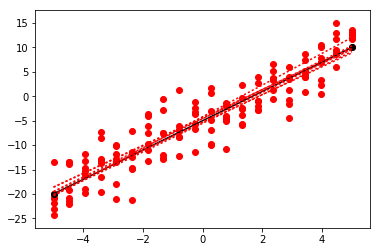

In [101]:

fit_m = np.zeros(n_experiments)
fit_b = np.zeros(n_experiments)

for i in range(n_experiments):
    # run an experiment
    x = np.linspace(x_min, x_max, 20) ;
    y = f(x) + noise_scaling * np.random.normal(size=x.shape) ;

    # Create a data frame and fit
    data = pandas.DataFrame({'x': x, 'y': y}) ;
    model = ols("y ~ x", data).fit() ;

    # print(model.summary())
    plt.scatter(x,y,color="red") ;

    fit_m[i] = model.params.x
    fit_b[i] = model.params.Intercept

print model.summary()

# the truth
plt.plot([x_min,x_max],[f(x_min),f(x_max)], "k-o") ;

for i in range(n_experiments) :
    fm = g(fit_m[i],fit_b[i])
    plt.plot([x_min,x_max],[fm(x_min),fm(x_max)], ":r") ;


### Analysis

The fit slopes and intercepts are random variables. We look at their statistics, and add lines to the plot to outline their variation.


In [102]:
print fit_m.mean(), fit_m.std(), fit_m.max(), fit_m.min()
print fit_b.mean(), fit_b.std(), fit_b.max(), fit_b.min()

2.95265637301 0.133317700614 3.24287407965 2.81734844788
-4.80909041235 0.497807932038 -4.18344418442 -5.53345854584


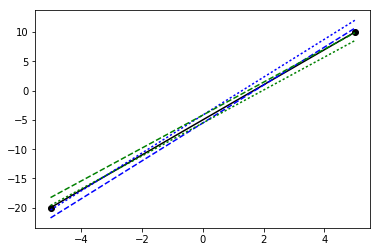

In [103]:
# the truth
plt.plot([x_min,x_max],[f(x_min),f(x_max)], "k-o") ;

fm = g(fit_m.max(),fit_b.min())
plt.plot([x_min,x_max],[fm(x_min),fm(x_max)],"b--")
fm = g(fit_m.max(),fit_b.max())
plt.plot([x_min,x_max],[fm(x_min),fm(x_max)],"b:")

fm = g(fit_m.min(),fit_b.min())
plt.plot([x_min,x_max],[fm(x_min),fm(x_max)],"g:")
fm = g(fit_m.min(),fit_b.max())
plt.plot([x_min,x_max],[fm(x_min),fm(x_max)],"g--")

### Exercises

* Extend to a second order model.
* Show the distribution of slope intercepts.
* Show the distribution of predicted values at the endpoints or at the origin.
* Introduce error bias, and consider the resulting fit.
